In [1]:
setwd('/import/liujing/data/my')

In [6]:
daa = read.csv('ssgsea.csv',row.names = 1)

In [8]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



In [27]:
daa$group = ifelse(daa$group == 'CI',1,0)

In [28]:
head(daa,2)

,Activated.CD8.T.cell,Central.memory.CD8.T.cell,Effector.memeory.CD8.T.cell,Activated.CD4.T.cell,Central.memory.CD4.T.cell,Effector.memeory.CD4.T.cell,T.follicular.helper.cell,Gamma.delta.T.cell,Type.1.T.helper.cell,Type.17.T.helper.cell,...,Natural.killer.T.cell,Activated.dendritic.cell,Plasmacytoid.dendritic.cell,Immature.dendritic.cell,Macrophage,Eosinophil,Mast.cell,Monocyte,Neutrophil,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,0.8074309,0.5477312,0.7382381,0.5855448,0.7558214,0.4947849,0.4558273,0.5336209,0.4187606,0.1991053,...,0.3864523,0.6510815,0.7277165,0.5491372,0.5076035,0.4786763,0.3852418,0.7487582,0.9761823,1
CI11_M1,0.7808498,0.6004184,0.7159009,0.4973485,0.7744737,0.4775414,0.4553192,0.5372276,0.4404532,0.1932253,...,0.3960414,0.6688941,0.8154273,0.5802745,0.5820121,0.5570139,0.4674401,0.8135400,1.0496631,1


In [30]:
x=daa[,1:28]
y=daa$group

In [31]:
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0

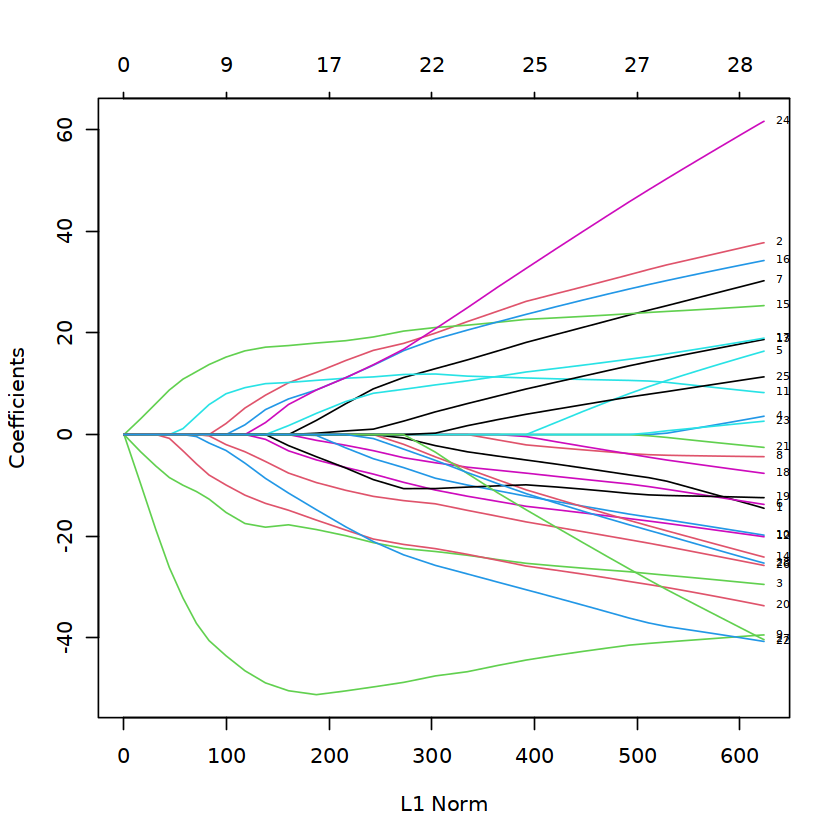

In [32]:

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=50, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

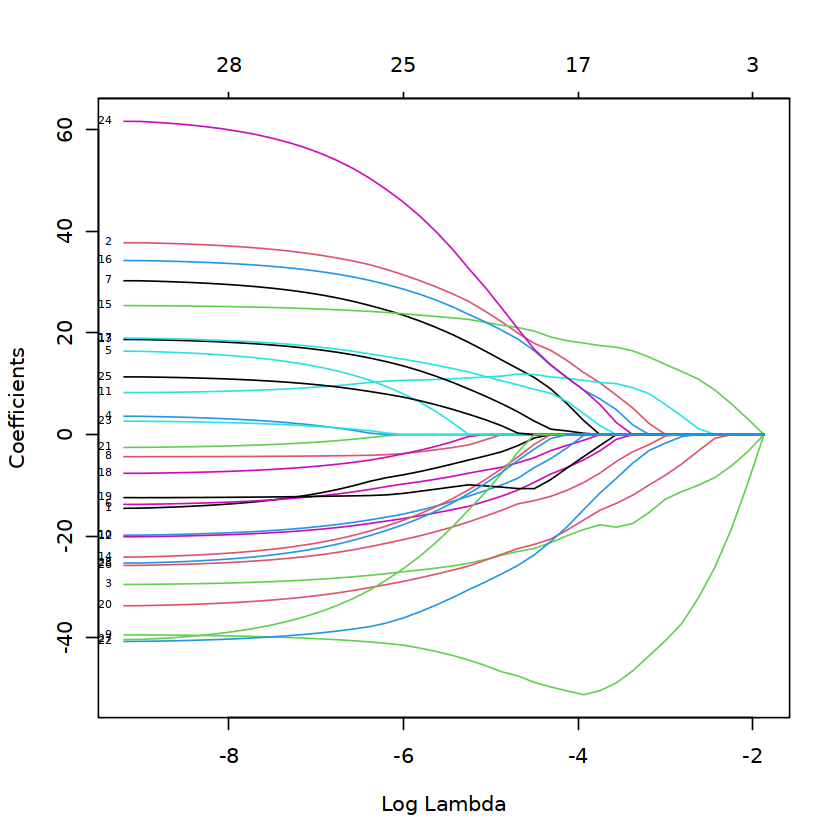

In [33]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [35]:
cv_fit <- cv.glmnet(x=as.matrix(x), y=y, alpha = 1, nlambda = 100)

[1] 0.02631838 0.08037253

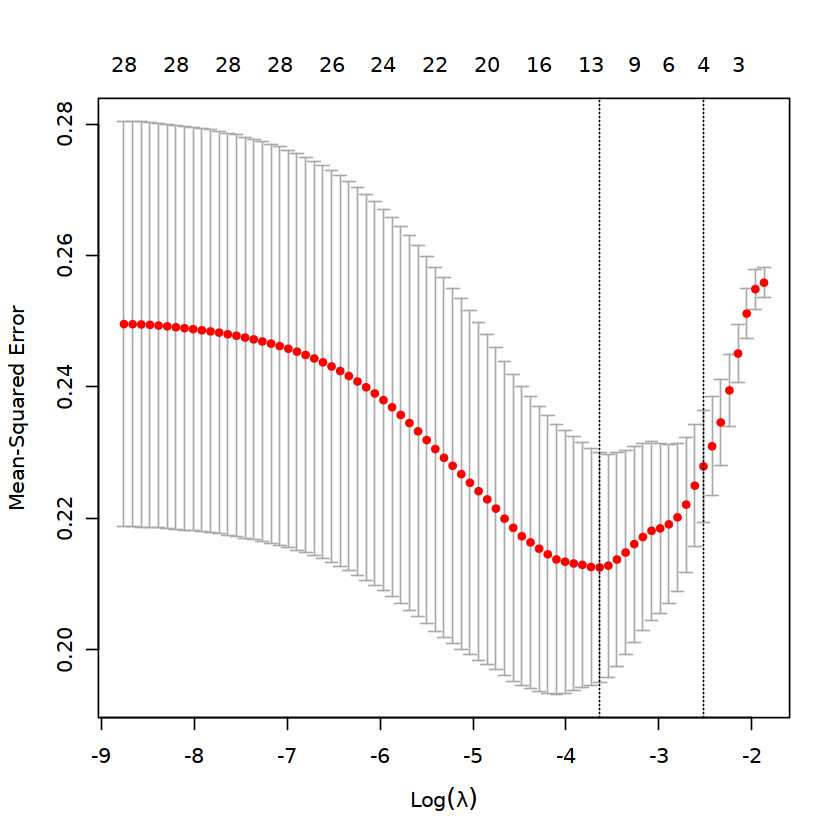

In [39]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [42]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.1se)



In [46]:

gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]

In [47]:
gene_1se

[1] "Effector.memeory.CD8.T.cell" "Type.1.T.helper.cell"       
[3] "Memory.B.cell"               "Natural.killer.T.cell"